# Assignment 5

### Exercise 10
This question should be answered using the Weekly data set, which is part of the ISLR package. This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1,089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

(a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier 

In [61]:
weekly = pd.read_csv("weekly.csv")
weekly.head()

Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today Direction
0  1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270      Down
1  1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576      Down
2  1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514        Up
3  1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712        Up
4  1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178        Up

In [62]:
weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1089 non-null   int64  
 1   Lag1       1089 non-null   float64
 2   Lag2       1089 non-null   float64
 3   Lag3       1089 non-null   float64
 4   Lag4       1089 non-null   float64
 5   Lag5       1089 non-null   float64
 6   Volume     1089 non-null   float64
 7   Today      1089 non-null   float64
 8   Direction  1089 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 76.7+ KB


In [63]:
weekly.describe()

Year         Lag1         Lag2         Lag3         Lag4  \
count  1089.000000  1089.000000  1089.000000  1089.000000  1089.000000   
mean   2000.048669     0.150585     0.151079     0.147205     0.145818   
std       6.033182     2.357013     2.357254     2.360502     2.360279   
min    1990.000000   -18.195000   -18.195000   -18.195000   -18.195000   
25%    1995.000000    -1.154000    -1.154000    -1.158000    -1.158000   
50%    2000.000000     0.241000     0.241000     0.241000     0.238000   
75%    2005.000000     1.405000     1.409000     1.409000     1.409000   
max    2010.000000    12.026000    12.026000    12.026000    12.026000   

              Lag5       Volume        Today  
count  1089.000000  1089.000000  1089.000000  
mean      0.139893     1.574618     0.149899  
std       2.361285     1.686636     2.356927  
min     -18.195000     0.087465   -18.195000  
25%      -1.166000     0.332022    -1.154000  
50%       0.234000     1.002680     0.241000  
75%       1.405000     2.053727     1.405000  
max      12.026000     9.328214    12.026000

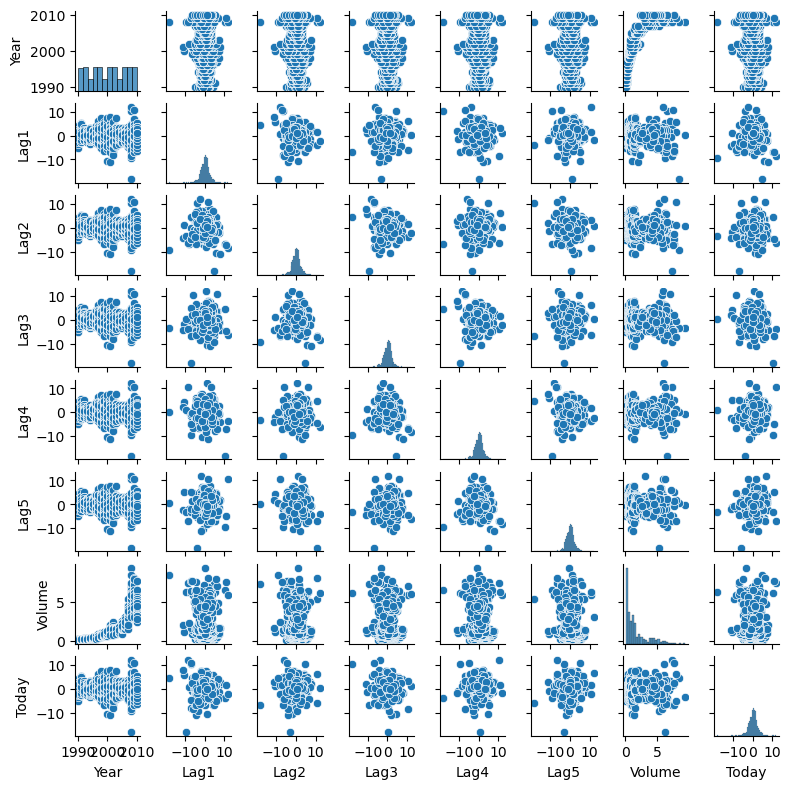

In [64]:
sns.pairplot(weekly, height = 1, aspect = 1)
plt.show()

In [65]:
corr_matrix = weekly.corr()
print(corr_matrix)

            Year      Lag1      Lag2      Lag3      Lag4      Lag5    Volume  \
Year    1.000000 -0.032289 -0.033390 -0.030006 -0.031128 -0.030519  0.841942   
Lag1   -0.032289  1.000000 -0.074853  0.058636 -0.071274 -0.008183 -0.064951   
Lag2   -0.033390 -0.074853  1.000000 -0.075721  0.058382 -0.072499 -0.085513   
Lag3   -0.030006  0.058636 -0.075721  1.000000 -0.075396  0.060657 -0.069288   
Lag4   -0.031128 -0.071274  0.058382 -0.075396  1.000000 -0.075675 -0.061075   
Lag5   -0.030519 -0.008183 -0.072499  0.060657 -0.075675  1.000000 -0.058517   
Volume  0.841942 -0.064951 -0.085513 -0.069288 -0.061075 -0.058517  1.000000   
Today  -0.032460 -0.075032  0.059167 -0.071244 -0.007826  0.011013 -0.033078   

           Today  
Year   -0.032460  
Lag1   -0.075032  
Lag2    0.059167  
Lag3   -0.071244  
Lag4   -0.007826  
Lag5    0.011013  
Volume -0.033078  
Today   1.000000  


Year and Volume seem to have a relationship

(b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

In [67]:
# Fit logistic regression model
X = sm.add_constant(weekly[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']])
y = weekly['Direction']
model = sm.Logit(y, X)
result = model.fit(maxiter=100)

# Print model summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 1.925080
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Tue, 28 Mar 2023   Pseudo R-squ.:                     inf
Time:                        16:08:06   Log-Likelihood:                -2096.4
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

C:\Users\Juanma\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Juanma\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Juanma\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:3511: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


Lag 2 is statistically significant to the 5% SL

(c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.


In [71]:
y_pred = result.predict(X) > 0.5
conf_mat = confusion_matrix(y, y_pred)
accuracy = np.trace(conf_mat) / np.sum(conf_mat)

In [72]:
# Print confusion matrix and accuracy
print('Confusion Matrix:')
print(conf_mat)
print('Accuracy:', accuracy)

Confusion Matrix:
[[ 54 430]
 [ 48 557]]
Accuracy: 0.5610651974288338


Percentage of correct predictions: (54+557)/(54+557+48+430) = 56.1%. Weeks the market goes up the logistic regression is right most of the time, 557/(557+48) = 92.1%. Weeks the market goes down the logistic regression is wrong most of the time 54/(430+54) = 11.2%.

(d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [74]:
train = weekly[weekly['Year'] < 2009]
test = weekly[weekly['Year'] >=2009]

X_train = sm.add_constant(train['Lag2'])
y_train = train['Direction']
model = sm.Logit(y_train, X_train)
result = model.fit(maxiter = 100)

Optimization terminated successfully.
         Current function value: 0.888927
         Iterations 4


In [75]:
X_test = sm.add_constant(test['Lag2'])
y_test = test['Direction']
y_pred = result.predict(X_test)

In [76]:
# Convert predicted probabilities to predicted classes
y_pred_class = (y_pred > 0.5).astype(int)

# Compute confusion matrix and overall fraction of correct predictions
conf_matrix = confusion_matrix(y_test, y_pred_class)
accuracy = (conf_matrix[0,0] + conf_matrix[1,1]) / len(y_test)

print("Confusion matrix:")
print(conf_matrix)
print("Overall fraction of correct predictions: {:.2f}".format(accuracy))

Confusion matrix:
[[ 9 34]
 [ 5 56]]
Overall fraction of correct predictions: 0.62


(f) Repeat (d) using LDA.

In [80]:
X_train = train[['Lag2']]
y_train = train['Direction']

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

X_test = test[['Lag2']]
y_test = test['Direction']
y_pred = lda.predict(X_test)

In [81]:
cm = confusion_matrix(y_test, y_pred)
accuracy = (cm[0,0]+cm[1,1])/cm.sum()

print('Confusion Matrix:')
print(cm)
print('Overall Accuracy: {:.2f}%'.format(accuracy*100))

Confusion Matrix:
[[ 9 34]
 [ 5 56]]
Overall Accuracy: 62.50%


(f) Repeat (d) using QDA.

In [85]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred = qda.predict(X_test)

In [86]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)
correct_pred = sum(cm[i][i] for i in range(2))
total_pred = sum(sum(cm[i]) for i in range(2))
accuracy = correct_pred / total_pred
print("Fraction of correct predictions:", accuracy)

Confusion matrix:
 [[ 0 43]
 [ 0 61]]
Fraction of correct predictions: 0.5865384615384616


(g) Repeat (d) using KNN with K = 1.

In [87]:
# create a new dataframe with only Lag2 column
X_train = weekly[weekly['Year'] < 2009]['Lag2'].values.reshape(-1, 1)
y_train = weekly[weekly['Year'] < 2009]['Direction']

X_test = weekly[weekly['Year'] >= 2009]['Lag2'].values.reshape(-1, 1)
y_test = weekly[weekly['Year'] >= 2009]['Direction']

# create a KNN classifier with k=1
knn = KNeighborsClassifier(n_neighbors=1)

# fit the model on the training data
knn.fit(X_train, y_train)

# predict the classes of the test data
y_pred = knn.predict(X_test)

# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# compute the overall fraction of correct predictions
accuracy = (cm[0,0]+cm[1,1])/cm.sum()

# print the confusion matrix and accuracy
print("Confusion Matrix:\n", cm)
print("Overall fraction of correct predictions: {:.2f}".format(accuracy))

Confusion Matrix:
 [[22 21]
 [30 31]]
Overall fraction of correct predictions: 0.51


C:\Users\Juanma\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
